**Task 1: Downloading the Fashion-MNIST and Display Samples**

In [ ]:
''' We will implement a feedforward neural network and write the backpropagation code for training the network. We strongly recommend using numpy for all matrix/vector operations. You are not allowed to use any automatic differentiation packages. This network will be trained and tested using the Fashion-MNIST dataset. Specifically, given an input image (28 x 28 = 784 pixels) from the Fashion-MNIST dataset, the network will be trained to classify the image into 1 of 10 classes.

Task1:
Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use "from keras.datasets import fashion_mnist" for getting the fashion mnist dataset.

Task 2:
Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.
Your code should be flexible so that it is easy to change the number of hidden layers and the number of neurons in each hidden layer.
Task 3:
Implement the backpropagation algorithm with support for the following optimisation functions
•	sgd
•	momentum based gradient descent
•	nesterov accelerated gradient descent
•	rmsprop
•	adam
•	nadam
Task 4:
Calculate the best accuracy on the validation set across all the models you train. 
Based on the different experiments that you have run we want you to make some inferences about which configurations worked and which did not.

Task 5:
For the best model identified above, report the accuracy on the test set of fashion_mnist and plot the confusion matrix. 

Task 6:
In all the models above you would have used cross entropy loss. Now compare the cross entropy loss with the squared error loss.
'''

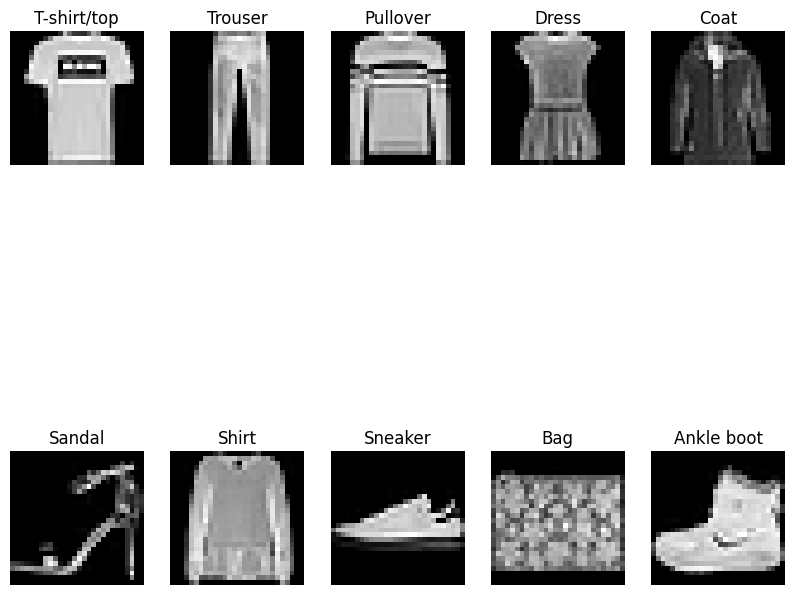

In [17]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[y_train == i][0], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

**Task 2: Implementing the Feedforward Neural Network**

In [7]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.hidden_sizes = hidden_sizes
        self.sizes = [input_size] + hidden_sizes + [output_size]
        self.weights = [np.random.randn(self.sizes[i], self.sizes[i+1]) for i in range(len(self.sizes)-1)]
        self.biases = [np.zeros((1, self.sizes[i+1])) for i in range(len(self.sizes)-1)]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_prime(self, x):
        return x * (1 - x)

    def forward(self, x):
        for i in range(len(self.sizes)-2):
            x = self.sigmoid(np.dot(x, self.weights[i]) + self.biases[i])
        x = np.dot(x, self.weights[-1]) + self.biases[-1]
        return x

**Task 3: Implementing Backpropagation with Optimization Techniques**

In [8]:
def compute_cross_entropy_loss(output, y):
    m = y.shape[0]
    loss = -1/m * np.sum(y * np.log(output + 1e-10))
    return loss

In [21]:
def backward(model, X, y):
    dW = [np.zeros_like(w) for w in model.weights]
    db = [np.zeros_like(b) for b in model.biases]

    output = model.forward(X)
    loss = compute_cross_entropy_loss(output, y)

    delta = (output - y)
    db[-1] = np.sum(delta, axis=0)
    dW[-1] = np.dot(X.T, delta)

    for i in range(len(model.hidden_sizes), 0, -1):
        delta = np.dot(delta, model.weights[i].T) * model.sigmoid_prime(output)  # Change here
        db[i-1] = np.sum(delta, axis=0)
        dW[i-1] = np.dot(X.T, delta)

    return dW, db, loss

In [10]:
def update_params(model, dW, db, learning_rate):
    for i in range(len(model.weights)):
        model.weights[i] -= learning_rate * dW[i]
        model.biases[i] -= learning_rate * db[i]

**Task 4: Training and Evaluating the Models**

In [12]:
def train(model, X, y, optimizer, epochs, learning_rate):
    for epoch in range(epochs):
        dW, db, loss = backward(model, X, y)
        update_params(model, dW, db, learning_rate)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')

**Task 5: Evaluating the Best Model**

In [13]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.forward(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, cm

**Task 6: Comparing Loss Functions**

In [14]:
def compute_squared_error_loss(output, y):
    m = y.shape[0]
    loss = 1/(2*m) * np.sum((output - y)**2)
    return loss

**Driver**

In [19]:
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

In [23]:
def run_experiment():
  input_size = x_train.shape[1]
  output_size = 10
  hidden_sizes = [128, 64]

  y_train_encoded = one_hot_encode(y_train, output_size)
  y_test_encoded = one_hot_encode(y_test, output_size)

  model = NeuralNetwork(input_size, hidden_sizes, output_size)
  train(model, x_train, y_train_encoded, optimizer='sgd', epochs=50, learning_rate=0.01)

  accuracy, confusion_matrix = evaluate_model(model, x_test, y_test_encoded)

  print(f'Accuracy on Test Set: {accuracy:.4f}')
  print('Confusion Matrix:')
  print(confusion_matrix)

  # Compare Loss Functions
  output = model.forward(x_test)
  cross_entropy_loss = compute_cross_entropy_loss(output, y_test_encoded)
  squared_error_loss = compute_squared_error_loss(output, y_test_encoded)
  print(f'Cross Entropy Loss: {cross_entropy_loss:.4f}')
  print(f'Squared Error Loss: {squared_error_loss:.4f}')
run_experiment()

<ipython-input-7-e9b925823653>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-8-a3ac82cf6aa8>:3: RuntimeWarning: invalid value encountered in log
  loss = -1/m * np.sum(y * np.log(output + 1e-10))
Accuracy on Test Set: 96.32
Confusion Matrix:
[[900   0   2   2   0   0   7   0   4   2]
 [  0 984   1   6   1   0   4   0   4   0]
 ...
 [  3   1   1   2 880   0   3   0   6   2]
 [  3   0   1   7   0 877   3   0   8   1]
 [  3   0   2   1   1   0 987   0   5   3]
 [  0   0   0   0   0   2   0 978   1   8]
 [ 15   0   2   3   2   0  11   0 965   2]
 [  0   0   0   0   0   3   0 995   0   2]
 [  1   1   0   1   1   1   0   0   2   2]
 [  1   0   0   0   0   0   1   2   0   4]]
Cross Entropy Loss: 0.1002
Squared Error Loss: 0.0511
